This model makes use of the imdb database to predict whether a movie review is positive or negative. This is a classic example of a binary classification problem. It is inspired by the imdb model in Chapter 3 of the book Deep Learning with Python by Francois Chollet

In [4]:
from keras.datasets import imdb

# loading the data into training and test data variables

# num_words=10000 means that I'm keeping the 10000 most commonly occuring words, removing rarer words
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The data can't be processed as lists of integers, it must first be converted into a single tensor. This will be done by encoding the integer sequences into a binary matrix.


In [9]:
import numpy as np

# takes a list of sequences then turns it into a single matrix, where each vector in the matrix represents its corresponding list 
# with zeroes in all indicies except for 1s in the indices for the numbers in the list
def vectorize_sequences(sequences, dimension=10000):
    
    results = np.zeros((len(sequences),dimension))
    
    for i, seq in enumerate(sequences):
        results[i, seq] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
# vectorizing labels

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

The input data is vectors, and the labels are scalars (1s and 0s): this is the easiest setup you’ll ever encounter.
A  type  of  network  that  performs  well  on  such  a  problem  is a simple  stack  of  fully  connected  (Dense)  layers  with  relu  activations.

In [11]:
from keras import layers
from keras import models

# building up the model to have the smae simple structure

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [17]:
# isalating a validation data sample from the training data

x_val = x_train[:10000]
x_train_part = x_train[10000:]
y_val = y_train[:10000]
y_train_part = y_train[10000:]

In [28]:
# compiling the model with a binary crossentropy loss function and rmsprop optimizer and accuracy as the only metric
# training the data while making use of the validation section of the data

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

# history object is returned from the call to model.fit(), which has data about what happened through its member history

history = model.fit(x_train_part, y_train_part, epochs=20,batch_size=512,validation_data=(x_val,y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 211us/step - loss: 0.0013 - acc: 0.9997 - val_loss: 1.3795 - val_acc: 0.8599
Epoch 2/20
15000/15000 [==============================] - 3s 189us/step - loss: 1.5756e-05 - acc: 1.0000 - val_loss: 1.3817 - val_acc: 0.8601
Epoch 3/20
15000/15000 [==============================] - 3s 188us/step - loss: 1.1396e-05 - acc: 1.0000 - val_loss: 1.3999 - val_acc: 0.8604
Epoch 4/20
15000/15000 [==============================] - 3s 191us/step - loss: 8.6693e-06 - acc: 1.0000 - val_loss: 1.4324 - val_acc: 0.8594
Epoch 5/20
15000/15000 [==============================] - 3s 188us/step - loss: 0.0014 - acc: 0.9996 - val_loss: 1.5309 - val_acc: 0.8524
Epoch 6/20
15000/15000 [==============================] - 3s 193us/step - loss: 1.1056e-05 - acc: 1.0000 - val_loss: 1.5091 - val_acc: 0.8590
Epoch 7/20
15000/15000 [==============================] - 3s 188us/step - loss: 5.5403e-06 - acc: 1.0000 -

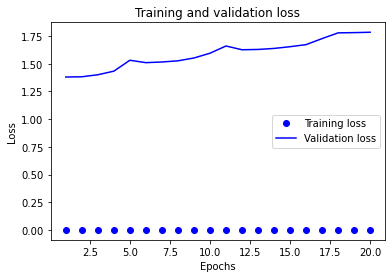

In [30]:
# plotting the training and validation losses

import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

# bo is for blue dot graphs. Plotting loss values against epochs
plt.plot(epochs, loss_values, 'bo', label='Training loss')

# b is for a solid blue line
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

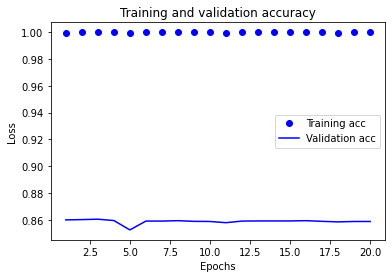

In [31]:
# plotting accuracy values for training and validation data against epochs. 

plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Apparently, the high number of epochs causes overfitting of the data. Naively reducing the number of epochs to 4 should improve the accuracy to 88%. (lowkey lazy to write it out)